Quadrature Phase Shift Keying (QPSK) is a type of phase modulation technique used in digital communication. It conveys data by changing, or modulating, the phase of a reference signal (the carrier wave). QPSK uses four distinct phase shifts to represent data, with each phase shift corresponding to a unique pair of bits. Here's a mathematical description of QPSK:

### Basic Concept

QPSK modulates the carrier signal into one of four possible phase states:
- $ \phi = 0^\circ $
- $ \phi = 90^\circ $
- $ \phi = 180^\circ $
- $ \phi = 270^\circ $

These four phase states represent the binary pairs (00, 01, 11, 10) respectively.

### Signal Representation

The QPSK signal can be mathematically represented as:

$ s(t) = A \cos (2\pi f_c t + \phi_i) $

Where:
- $ A $ is the amplitude of the carrier signal.
- $ f_c $ is the carrier frequency.
- $ \phi_i $ is the phase shift, which depends on the input data bits.

Each symbol in QPSK represents two bits, hence the phase shift $ \phi_i $ for the $ i $-th symbol can be given by:

$ \phi_i = \left\{
\begin{array}{ll}
0^\circ & \text{for } 00 \\
90^\circ & \text{for } 01 \\
180^\circ & \text{for } 11 \\
270^\circ & \text{for } 10 \\
\end{array}
\right. $

### Quadrature Components

QPSK can be decomposed into two orthogonal components:
- The in-phase component (I)
- The quadrature component (Q)

These components can be represented as:

$ I(t) = A \cos (\phi_i) $
$ Q(t) = A \sin (\phi_i) $

The modulated signal can be expressed as the sum of these components modulated by the carrier frequency:

$ s(t) = I(t) \cos (2\pi f_c t) - Q(t) \sin (2\pi f_c t) $

For the four possible symbols, the in-phase and quadrature components take the following values:
- For $ 00 $: $ I = A $, $ Q = 0 $
- For $ 01 $: $ I = 0 $, $ Q = A $
- For $ 11 $: $ I = -A $, $ Q = 0 $
- For $ 10 $: $ I = 0 $, $ Q = -A $

### Mathematical Example

Consider a QPSK signal with a carrier frequency $ f_c $ and a symbol rate of $ f_s $. The transmitted signal $ s(t) $ over a period of $ T $ seconds can be expressed as:

$ s(t) = \sum_{n=0}^{N-1} \left[ I_n \cos (2\pi f_c t) - Q_n \sin (2\pi f_c t) \right] $

Where:
- $ N $ is the number of symbols.
- $ I_n $ and $ Q_n $ are the in-phase and quadrature components of the $ n $-th symbol, respectively.

The in-phase and quadrature components are determined by the input bit pairs, which map to specific phase shifts.

### Generation in Julia

Given the mathematical description, the generation of a QPSK signal in Julia involves:
1. Mapping input bits to QPSK symbols.
2. Creating in-phase and quadrature components based on the symbols.
3. Modulating these components with the carrier frequency to produce the final QPSK signal.

Here's the revised Julia code incorporating these steps:



In [1]:
# First, install the necessary package
# using Pkg
# Pkg.add("Plots")

# Import the required libraries
using Plots

In [3]:
# In-Phase Component Function
function in_phase_component(bit_pair::Tuple{Int, Int})
    bit1, bit2 = bit_pair
    return 2 * (bit1 == 0) - 1
end

in_phase_component (generic function with 1 method)

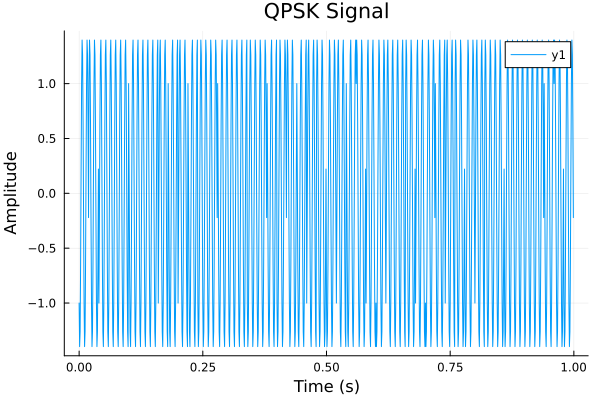

In [4]:
# Define parameters
fs = 1000            # Sampling frequency
fc = 100             # Carrier frequency
bit_rate = 100       # Bit rate
num_bits = 100       # Number of bits to transmit
T = num_bits / bit_rate # Total time
t = 0:1/fs:T-(1/fs)  # Time vector

# Generate random bits
bits = rand(0:1, num_bits)

# Map bits to QPSK symbols
# 00 -> 1 + 0im
# 01 -> 0 + 1im
# 11 -> -1 + 0im
# 10 -> 0 - 1im
symbols = [complex(2*(bits[i] == 0) - 1, 2*(bits[i+1] == 0) - 1) for i in 1:2:num_bits-1]

# Repeat symbols to match the sampling frequency
symbol_rate = bit_rate / 2
samples_per_symbol = div(fs, symbol_rate)
signal = vcat([fill(symbol, Int(samples_per_symbol)) for symbol in symbols]...)

# Generate the carrier
carrier_i = cos.(2π*fc*t)
carrier_q = sin.(2π*fc*t)

# Ensure the length of t matches the length of the signal
t = t[1:length(signal)]

# Modulate the carrier with the signal
qpsk_signal = real(signal) .* carrier_i - imag(signal) .* carrier_q

# Plot the QPSK signal
plot(t, qpsk_signal, title="QPSK Signal", xlabel="Time (s)", ylabel="Amplitude")




This code uses the in-phase and quadrature components to modulate the carrier signal, generating the QPSK signal based on the mathematical description provided.